Nome: Gustavo Germano Silva - Matricula: 2015086620

A proposta do trabalho é corrigir uma prova através do scan de um gabarito. Para tal, foram usadas as seguintes bibliotecas:

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

A função abaixo identifica qual das alternativas de uma questão foi marcada, de acordo com a coordenada do eixo X.
Como são duas colunas de respostas (de 1 a 15 e de 16 a 30),
são utilizados dois range para identificar de qual coluna se trata, e a partir disso é possivel identificar a opção marcada.

In [40]:
def getOption(x):
	if x in range(40,70) or x in range(370,400):
		return 'A'
	if x in range(85,115) or x in range(415,445):
		return 'B'
	if x in range(130,160) or x in range(460,490):
		return 'C'
	if x in range(175,200) or x in range(505,535):
		return 'D'
	if x in range(220,255) or x in range(550,580):
		return 'E'
	else:
		return 'Erro' + str(x)

A função abaixa identifica qual questão está sendo corrigida, dentre as 30 possíveis. É utilizado a coordenada y para identificar em qual linha a questão está. Como são duas questões por linha (1 e 16, 2 e 17, etc), a coordenada x é utilizada para discernir entre as duas possibilidades.

In [41]:
def getAnswer(x,y):
	#line 1
	if y in range(3,13):
		if x > 300:
			return 16
		else:
			return 1
			
	#line 2
	if y in range(25,35):
		if x > 300:
			return 17
		else:
			return 2
			
	#line 3
	if y in range(47,57):
		if x > 300:
			return 18
		else:
			return 3
	#line 4
	if y in range(67,77):
		if x > 300:
			return 19
		else:
			return 4
	#line 5
	if y in range(93,103):
		if x > 300:
			return 20
			
		else:
			return 5
	#line 6
	if y in range(115,125):
		if x > 300:
			return 21
		else:
			return 6
	#line 7
	if y in range(138,148):
		if x > 300:
			return 22
		else:
			return 7
	#line 8
	if y in range(160,170):
		if x > 300:
			return 23
			
		else:
			return 8
	#line 9
	if y in range(185,195):
		if x > 300:
			return 24
		else:
			return 9
			
	#line 10
	if y in range(207,217):
		if x > 300:
			return 25
		else:
			return 10
	#line 11
	if y in range(228,238):
		if x > 300:
			return 26
		else:
			return 11
	#line 12
	if y in range(252,262):
		if x > 300:
			return 27
		else:
			return 12
	#line 13
	if y in range(275,285):
		if x > 300:
			return 28
		else:
			return 13
	#line 14
	if y in range(300,310):
		if x > 300:
			return 29
		else:
			return 14
	#line 15
	if y in range(320,330):	
		if x > 300:
			return 30
		else:
			return 15


Aqui é iniciada a parte de pré-processamento da imagem. O primeiro passo dessa função é redimensionar a imagem de entrada para um tamanho fixo, para facilitar o processo de identificação. Logo após isso, a imagem é recortada, mantendo-se apenas a parte que diz respeito ao cartão de respostas propriamente dito.
Depois disso, são aplicados alguns filtros que possibilitarão a detecção dos contornos da imagem. Esses filtros serão explicados e demonstrados adiante.
Após isso, é chamada a função que verifica se a imagem foi rotacionada.

In [42]:
def getImages(image):
	image = cv2.resize(image,(960,1080))
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	blurred = cv2.GaussianBlur(gray, (5, 5), 0)
	edged = cv2.Canny(blurred, 75, 200)
	thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

	return rotateImage(image,gray,blurred,edged,thresh)


A função abaixo começa obtendo os contornos da imagem, que nesse caso correspondem as regiões de bordas da imagem.
A função minAreaRect retorna um array que na primeira posição contém uma tupla com as coordenadas x,y do centro da borda e na terceira posição o ângulo de rotação da borda. Esses parâmetros são utilizados para rotacionar uma imagem que não vem alinhada.


In [43]:
def rotateImage(image,gray,blurred,edged,thresh):
	thresh = thresh[330:680,193:804]
	cnts = getContours(thresh)
	box = cv2.minAreaRect(cnts[1])

	if box[2] != 0.0: 
		print 'entrou' + box[2]
		rot_mat = cv2.getRotationMatrix2D(box[0],0 - box[2], 1)
		image = cv2.warpAffine(image, rot_mat, (image.shape[0], image.shape[1]), flags=cv2.INTER_LINEAR)
		gray = cv2.warpAffine(gray, rot_mat, (gray.shape[0], gray.shape[1]), flags=cv2.INTER_LINEAR)
		blurred = cv2.warpAffine(blurred, rot_mat, (blurred.shape[0], blurred.shape[1]), flags=cv2.INTER_LINEAR)
		edged = cv2.warpAffine(edged, rot_mat, (edged.shape[0], edged.shape[1]), flags=cv2.INTER_LINEAR)
		thresh = cv2.warpAffine(thresh, rot_mat, (thresh.shape[0], thresh.shape[1]), flags=cv2.INTER_LINEAR)
		thresh = thresh[330:680,193:804]
		cnts = getContours(thresh)

	image = image[330:680,193:804]
	return image,gray,blurred,edged,thresh,cnts

A função abaixo apenas realiza a chamada do findCountours() do openCV, que retorna um array que, na segunda posição, contém uma lista com os contornos da imagem.

In [44]:
def getContours(thresh):
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
	return cnts[1]


Abaixo as imagens são salvas nas suas respectivas variáveis: A primeira é a imagem original, a segunda com um blur+gray para tornar a imagem mais homogenea, o edged contém as bordas evidênciadas e o thresh contém a imagem limiarizada. Como só a imagem original e a thresh são utilizadas no processamento final (as outras são passos intermediários), apenas elas estão recortadas.

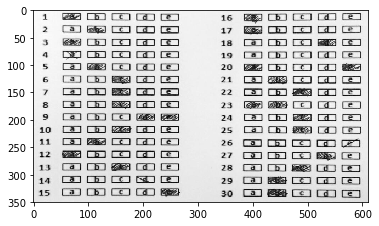

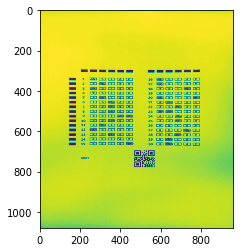

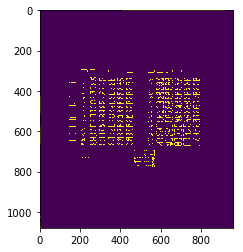

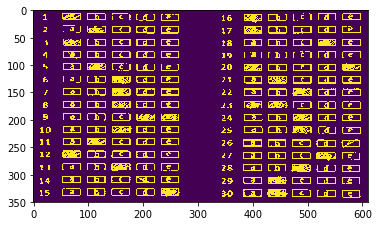

In [45]:
image = cv2.imread('dados/pattern_0001_scan.png');
image, gray, blurred, edged, thresh, cnts = getImages(image)
plt.imshow(image)
plt.show()
plt.imshow(blurred)
plt.show()
plt.imshow(edged)
plt.show()
plt.imshow(thresh)
plt.show()

Abaixo são criadas as listas que conterão as caixas de resposta e a lista com a apresentação dos resultados, respectivamente. O for itera sobre todos os contornos identificados na imagem cortada. É utilizada uma mascara para pintar a caixa das respostas preenchidas de vermelho. O if realiza uma verificação, através da altura, tamanho, proporção e da 'intensidade' da borda. 'Intensidades' maiores advém de caixas preenchidas. Esses valores foram colhidos experimentalmente. Assim, se um dos contornos atende esses requisitos, significa que ele é uma caixa de respostas marcada. Assim, as funções são chamadas para identificar de qual alternativa e questão se trata, e é realizado o tratamento para verificar se a mesma questão foi marcada mais de uma vez.
É exibido a imagem com as questões marcadas, além da saída da correção. A correção também é escrita no arquivo 'respostas.txt'.

1 : A
2 : B
3 : A
4 : Branco
5 : B
6 : C
7 : C
8 : C
9 : Nulo
10 : C
11 : B
12 : A
13 : C
14 : Branco
15 : E
16 : A
17 : A
18 : D
19 : Branco
20 : Nulo
21 : B
22 : C
23 : Nulo
24 : C
25 : C
26 : Branco
27 : D
28 : C
29 : B
30 : B


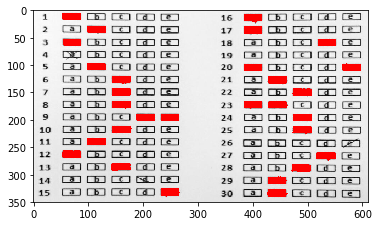

In [46]:

questionCnts = []
lista = [': Branco'] * 31

for c in cnts:
	x,y,w,h = cv2.boundingRect(c)
	ar = w / float(h)
	mask = np.zeros(thresh.shape, dtype="uint8")
	cv2.drawContours(mask, [c], -1, 255, -1)
	
	mask = cv2.bitwise_and(thresh, thresh, mask=mask)
	total = cv2.countNonZero(mask)

	if w >= 10 and h >= 10 and ar >= 1.5 and ar <= 10.1:
		if total > 270:
			if(lista[getAnswer(x,y)] == ': Branco'):
				lista[getAnswer(x,y)] = ': ' + getOption(x)
			else:
				lista[getAnswer(x,y)] = ': Nulo'
			cv2.drawContours(image, [c], -1, 255, -1)

f = open('respostas.txt', 'w')
for i in range(1,31):
	print str(i) + " " + lista[i] 
	f.write(str(i) + " " + lista[i]+ "\n")
f.close()
plt.imshow(image)
plt.show()